In [45]:
import pandas as pd
import numpy as np

In [46]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from sklearn.model_selection import train_test_split 

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
data = pd.read_csv('daily_bike_share.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [52]:
data.shape

(731, 14)

In [53]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
rentals         int64
dtype: object

**The data consists of the following columns:**

- instant: A unique row identifier


- dteday: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.


- season: A numerically encoded value indicating the season
        * 1:spring
        * 2:summer
        * 3:fall 
        * 4:winter


- yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)


- mnth: The calendar month in which the observation was made (1:January ... 12:December)


- holiday: A binary value indicating whether or not the observation was made on a public holiday)


- weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)


- workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)


- weathersit: A categorical value indicating the weather situation
        * 1:clear
        * 2:mist/cloud
        * 3:light rain/snow
        * 4:heavy rain/hail/snow/fog


- temp: The temperature in celsius (normalized)


- atemp: The apparent ("feels-like") temperature in celsius (normalized)


- hum: The humidity level (normalized)


- windspeed: The windspeed (normalized)


- rentals: The number of bicycle rentals recorded.

In [54]:
data['Day'] = pd.DatetimeIndex(data['dteday']).day
data.head(40)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,Day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [55]:
num_feat = ['temp','atemp','hum','windspeed']

In [56]:
data[num_feat+['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


`quartile values` : the threshold values for 
   - 25% 
   - 50% -> which is also the median
   - 75% of the data

`We can see that the mean number of daily rentals is around 848 , but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day.`

Text(0.5, 0.98, 'Rental Distribution')

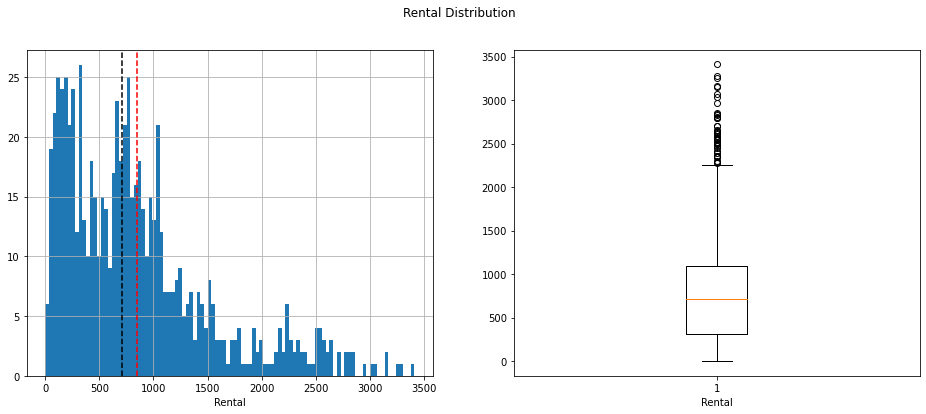

In [57]:
plt.subplot(1,2,1)
data['rentals'].hist(bins=100 ,figsize = (16,6))
plt.axvline(data['rentals'].mean() ,linestyle='--' ,color='red')
plt.axvline(data['rentals'].median() ,linestyle='--' ,color='black')
plt.xlabel('Rental')


plt.subplot(1,2,2)
plt.boxplot(data['rentals'])
plt.xlabel('Rental')


plt.suptitle('Rental Distribution')

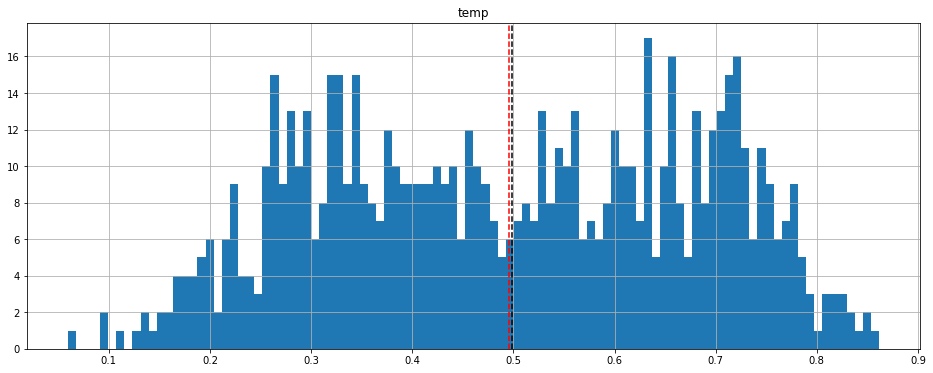

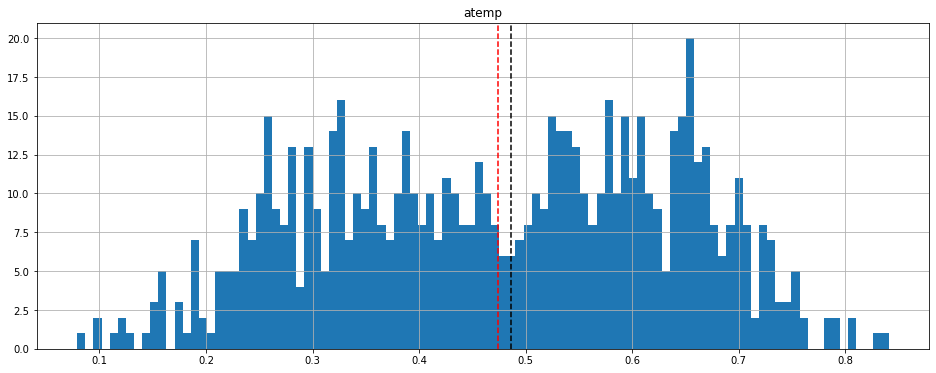

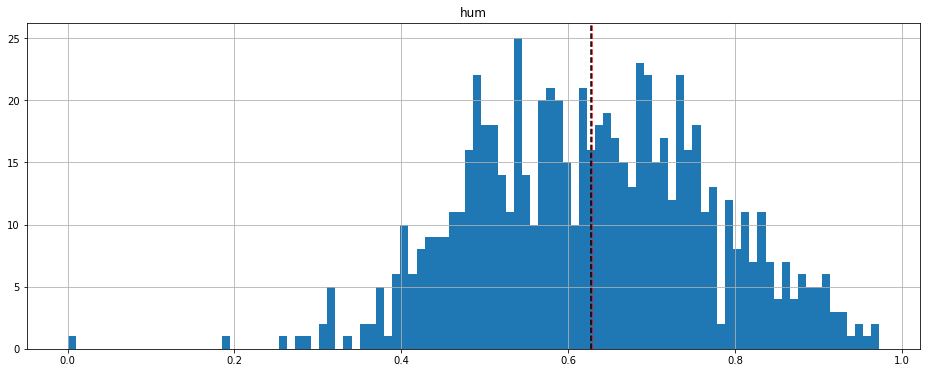

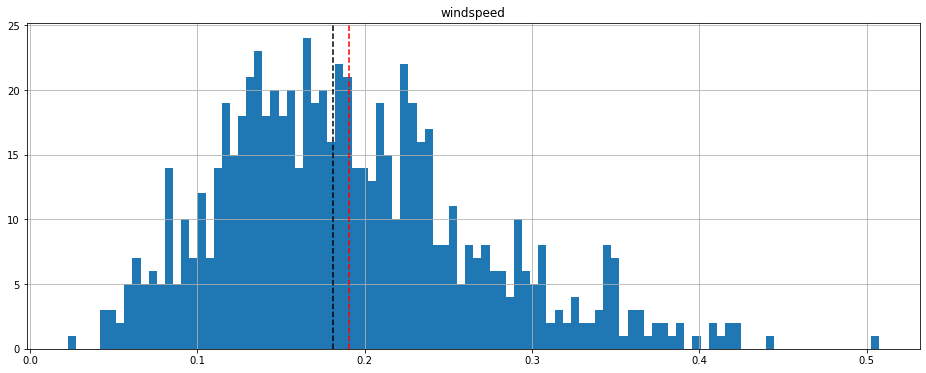

In [58]:
for col in num_feat:
    data[col].hist(bins=100 ,figsize = (16,6))
    plt.axvline(data[col].mean() ,linestyle='--' ,color='red')
    plt.axvline(data[col].median() ,linestyle='--' ,color='black')
    
    plt.title(col)
    plt.show()

- The numeric features seem to be more normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are.

For relationships between the features and the rentals label we want to be able to predict.

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship..

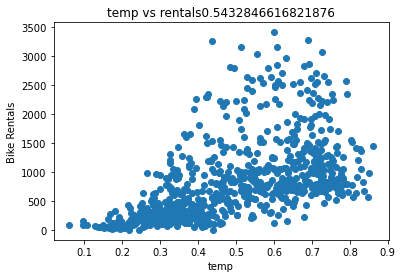

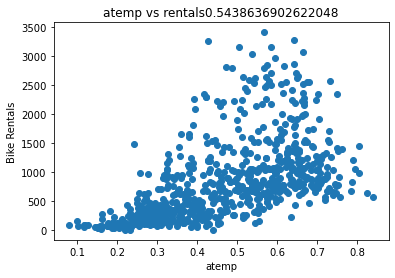

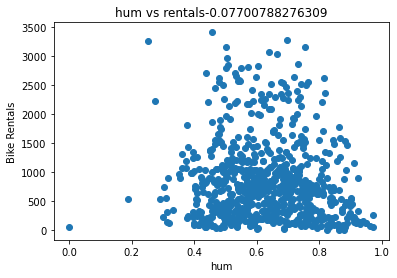

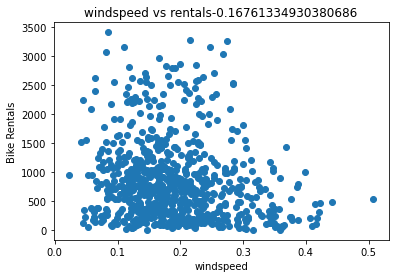

In [59]:
for feat in num_feat:
    
    corr = data[feat].corr(data['rentals'])
    plt.scatter(data[feat],data['rentals'])
    
    plt.xlabel(feat)
    plt.ylabel('Bike Rentals')
    
    plt.title(feat+' vs '+'rentals' + str(corr))
    plt.show()

- higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both

- for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

In [60]:
categorical_feat = ['season','mnth','holiday','weekday','workingday','weathersit', 'Day']

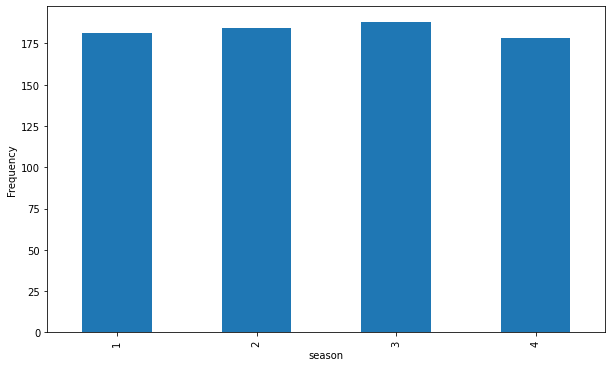

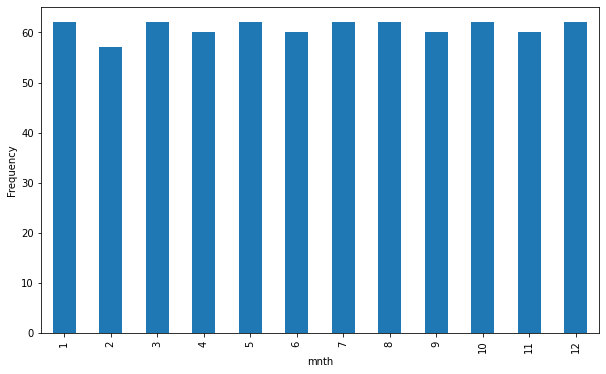

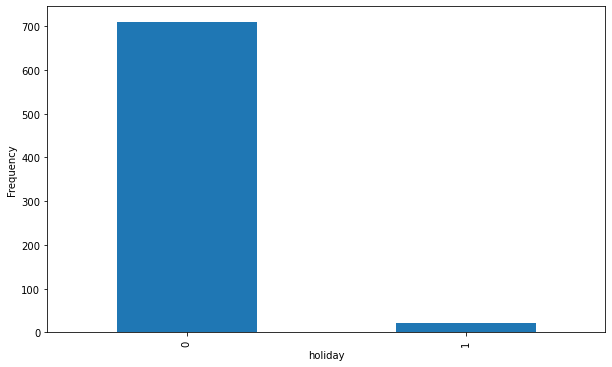

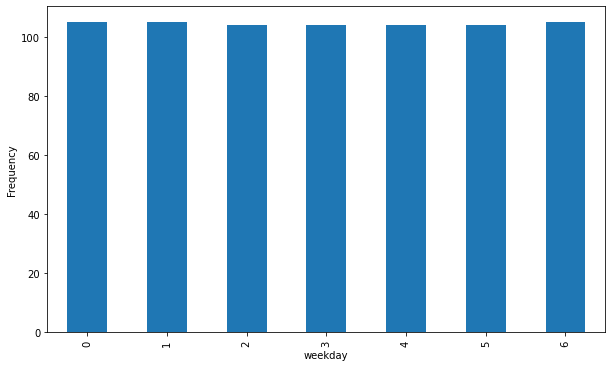

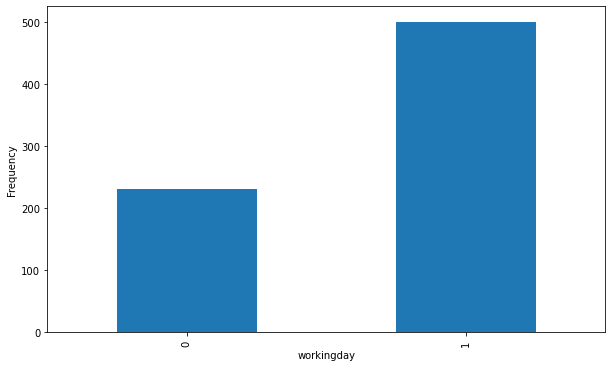

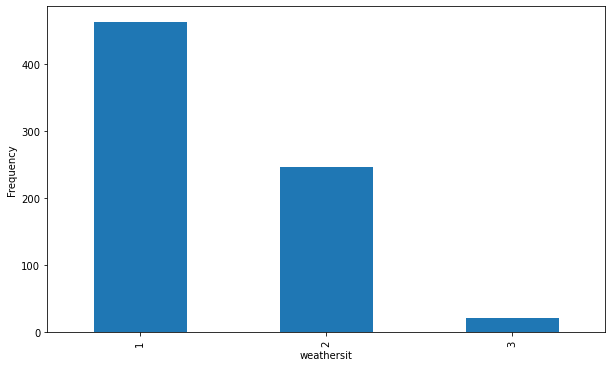

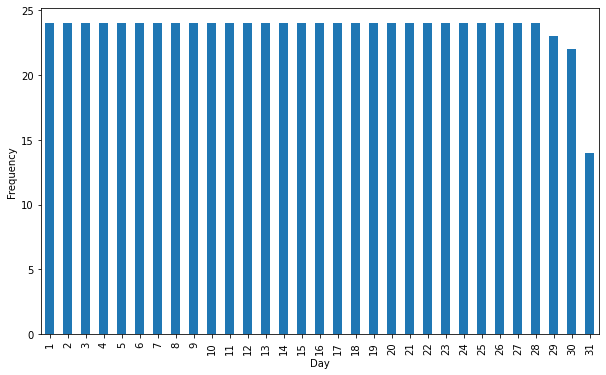

In [61]:
for feat in categorical_feat:
    plt.figure(figsize=(10,6))
    count = data[feat].value_counts().sort_index()
    count.plot(kind='bar')
    
    plt.xlabel(feat) 
    plt.ylabel("Frequency")
    
    plt.show()

Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

* holiday: There are many fewer days that are holidays than days that aren't.
* workingday: There are more working days than non-working days.
* weathersit: Most days are category 1 (clear), with category 2 (mist and cloud) the next most common. There are comparatively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all.

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

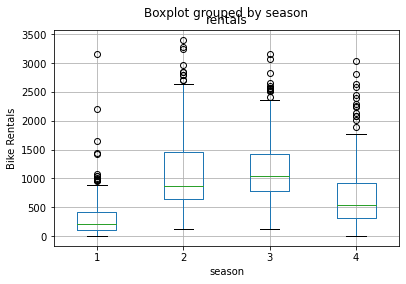

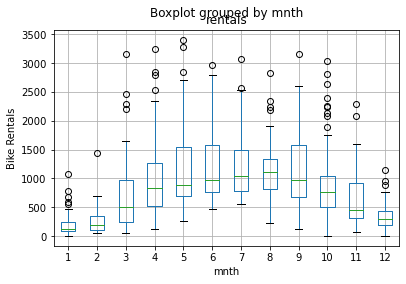

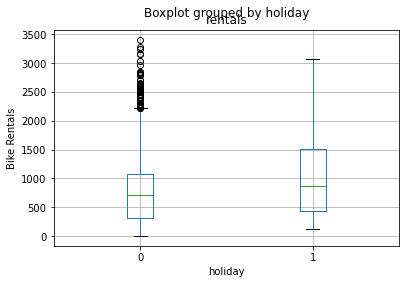

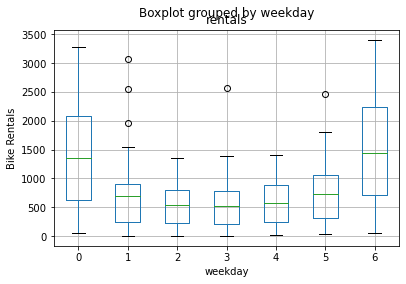

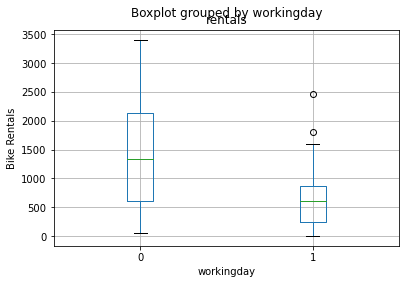

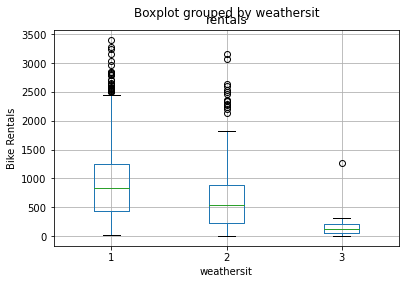

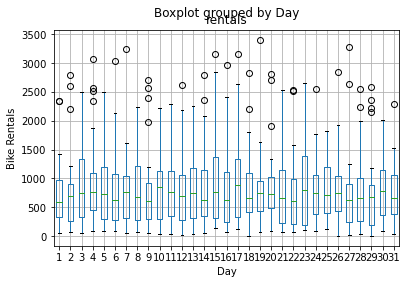

In [18]:
for feat in categorical_feat:

    data.boxplot(column='rentals',by=feat)
    plt.xlabel(feat) 
    plt.ylabel("Bike Rentals")
plt.show()

The plots show some variance in the relationship between some category values and rentals. 

`For example,`
 - there's a clear difference in the distribution of rentals on weekends (weekday 0 or 6) and those during the working week (weekday 1 to 5). 

- Similarly, there are notable differences for holiday and workingday categories. 

- There's a noticeable trend that shows different rental distributions in summer and fall months compared to spring and winter months. 

- The weathersit category also seems to make a difference in rental distribution. 

- The day feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals.

In [19]:
X = data[['temp','atemp','hum','windspeed','season','mnth','holiday','weekday','workingday','weathersit']]
y = data['rentals']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train ,y_train) 

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

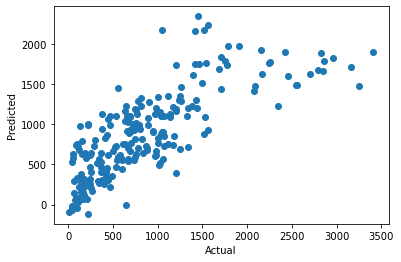

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

`variance` represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label.

In [25]:
mse = mean_squared_error(y_test ,y_pred)
print('MSE : ',mse)

MSE :  201972.55947035592


In [26]:
rmse = np.sqrt(mse)
print('RMSE : ',rmse)

RMSE :  449.4135728595165


In [27]:
r2_score(y_test,y_pred)

0.6040454736919191

In [28]:
model2 = Lasso()

In [29]:
model2.fit(X_train,y_train)

Lasso()

In [30]:
y_pred2 = model2.predict(X_test)

In [31]:
mse = mean_squared_error(y_test ,y_pred2)
mse

201155.6134491346

In [32]:
rmse = np.sqrt(mse)
rmse

448.50374964891273

In [33]:
r2_score(y_test,y_pred2)

0.6056470450920153

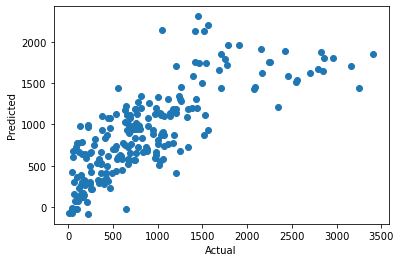

In [34]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()